In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [3]:
data = pd.read_csv('Advertising.csv')

In [4]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

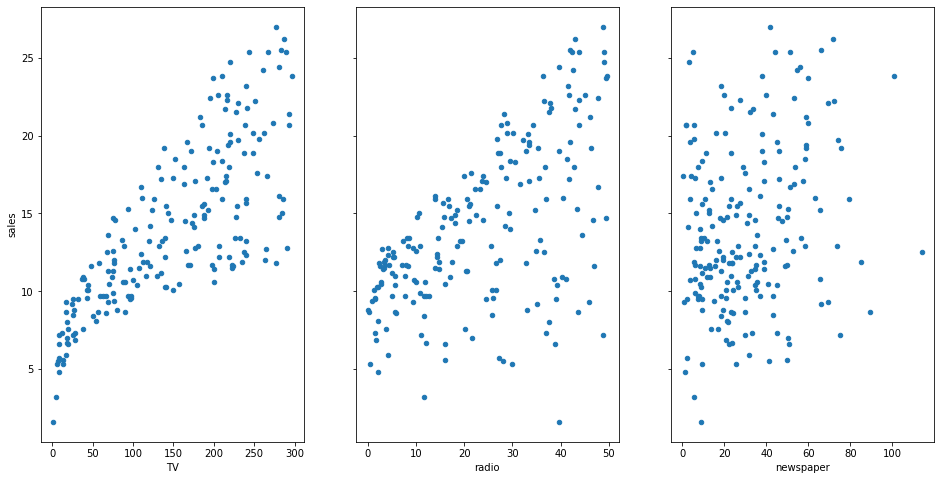

In [9]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

In [13]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127694
[0.04753664]


In [11]:
# create X and y
feature_cols = ['radio']
X = data[feature_cols]
y = data.sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

9.311638095158283
[0.20249578]


In [12]:
# create X and y
feature_cols = ['newspaper']
X = data[feature_cols]
y = data.sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

12.351407069278162
[0.0546931]


In [14]:
7.032594 + .047537*50

9.409444

In [15]:
x_new = pd.DataFrame({'TV' : [50]})
x_new.head()

,TV
0,50


In [16]:
lm.predict(x_new)

array([9.40942557])

In [17]:
x_new = pd.DataFrame ({'TV' : [data.TV.min(), data.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


In [18]:
preds = lm.predict(x_new)
preds

array([ 7.0658692 , 21.12245377])

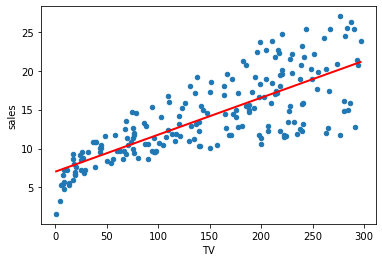

In [23]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(x_new, preds, c='red', linewidth=2)

In [24]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [25]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [27]:
lm.rsquared

0.611875050850071